## Model of Lupus Nephritis
#### see paper: [here](https://tbiomed.biomedcentral.com/articles/10.1186/1742-4682-7-14)

In [ ]:
import numpy as np
import pandas as pd

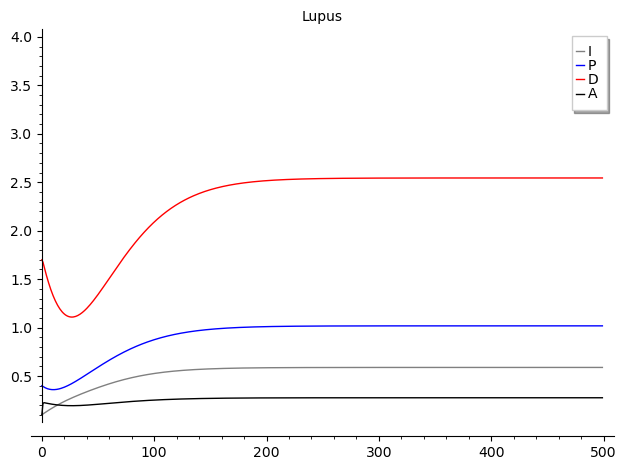

In [50]:
import numpy
# Define Variables and parameters
Lupusvars = list(var("I", "P", "D", "A"))

si = 0.002 #rate that immune complexes deposit in the kidneys
sid = 0.015 #immune response to accumulation of damaged cells
kid = 1
kip = 0.025 #rate of immune complex removal from system
kpi = 0.13 #rate of mediator activation and recruitment
kpp = 0.02 #immune response amplified by existing inflammatory response (kpi)
kpd = 0.001 #rate of activation for pro-inflammatory agents as a result of cytokine release or induced by damaged tissue
mup = 0.06 #decay of pro-inflammatory mediators
kdip = 0.025 #rate of phagocytosis of immune complexes by immune cells
kdp = 0.27 #rate at which collateral damage is produced by pro-inflammatory mediators 
mud = 0.04 #decay rate of damage
sa = 0.05 #addition of anti-inflammatory drugs
kap = 0.022 #intrarenal production of anti-inflammatory mediators
kad = 0.22 #intrarenal rate of tissue damage ??
mua = 2.2 #rate of anti-inflammatory agent degradation
Ainf = 1

(xmin, xmax, ymin, ymax) = (0, 1, 0, 4)

def f(x):
    return x/((1+A/Ainf)^2)

Idot = f(si) + f(sid)*(D^2/(kid^2 + D^2)) - kip*f(P)*I
Pdot = f(kpi*I + kpp*P) + f(kpd*D) - mup*P
Ddot = kdip*f(P)*I + kdp*f(P) - mud*D - (A^2)
Adot = 5*sa + f(kap*P + kad*D) - mua*A

LupusSystem = (Idot, Pdot, Ddot, Adot)
init = (0.1, 0.4, 1.7, 0.1)

tmax=500
t_range = srange(0, tmax, 1)

LupusSim = desolve_odeint(LupusSystem, init, t_range, Lupusvars)
LupusSim = numpy.insert(LupusSim, 0, t_range, axis=1)
Its = list_plot(LupusSim[::,(0,1)], plotjoined=True, color="grey", legend_label="I")
Pts = list_plot(LupusSim[::,(0,2)], plotjoined=True, color="blue", legend_label="P")
Dts = list_plot(LupusSim[::,(0,3)], plotjoined=True, color="red", legend_label="D")
Ats = list_plot(LupusSim[::,(0,4)], plotjoined=True, color="black", legend_label="A")
show(Its+Pts+Dts+Ats, title = "Lupus", ymax = ymax)

## CHIARA

In [52]:
import numpy as np
import random
from scipy.integrate import odeint

In [78]:

# Define Variables and parameters
def lupus_periodic_flare(init = (0.1, 0.4, 1.7, 0.1), # tuple: (I0, P0, D0, A0)
                         tmax=600, # number of days to simulate
                         sep = 45, # num of days in between flares
                         flare_length = 10, # num of days a flare lasts
                         si = 0.002, # base rate that immune complexes deposit in the kidneys
                         sid = 0.015, # base immune response to accumulation of damaged cells
                         kid = 1,
                         kip = 0.025, #rate of immune complex removal from system
                         kpi = 0.13, #rate of mediator activation and recruitment
                         kpp = 0.02, #immune response amplified by existing inflammatory response (kpi)
                         kpd = 0.001, #rate of activation for pro-inflammatory agents as a result of cytokine release or induced by damaged tissue
                         mup = 0.06, #decay of pro-inflammatory mediators
                         kdip = 0.025, #rate of phagocytosis of immune complexes by immune cells
                         kdp = 0.27, #rate at which collateral damage is produced by pro-inflammatory mediators 
                         mud = 0.04, #decay rate of damage
                         sa = 0.05, #addition of anti-inflammatory drugs
                         kap = 0.022, #intrarenal production of anti-inflammatory mediators
                         kad = 0.22, #intrarenal rate of tissue damage ??
                         mua = 2.2, #rate of anti-inflammatory agent degradation
                         Ainf = 1
                        ):

    Lupusvars = list(var("I", "P", "D", "A"))
    t_range = srange(0, tmax, 1)

    def fsid_t(t): #time dependency Sid
        sid = 0.002
        if numpy.mod(t,sep) <= flare_length : #gives the higher value for ~two weeks of time based on data
            sid = sid*5
        else:
            sid = 0.002
        return sid 

    def fsi_t(t): #time dependency Si
        si = 0.001
        if numpy.mod(t,sep) <= flare_length : 
            si = si*5
        else:
            si = 0.001
        return si

    def systems (IPDA, t, sa_t, si_t,sid_t, kip_t, kpp_t, kpi_t, kpd_t, kdip_t,kdp_t, kap_t,kad_t,mup_t,mua_t,mud_t,kid_t, Ainf_t ):
        I, P, D, A = IPDA 
        def f(x):
            return x/((1+A/Ainf)^2) 

        Idot = f(si_t(t)) + f(sid_t(t))*(D^2/(kid_t^2 + D^2)) - kip_t*f(P)*I
        Pdot = f(kpi_t*I + kpp_t*P) + f(kpd_t*D) - mup_t*P
        Ddot = kdip_t*f(P)*I + kdp_t*f(P) - mud_t*D
        Adot = sa_t + f(kap_t*P + kad_t*D) - mua_t*A

        LupusSystem = (Idot, Pdot, Ddot, Adot)
        return LupusSystem

    IPDAsim = odeint(systems, init, t_range, args=(sa, fsi_t, fsid_t, kip, kpp, kpi, kpd, kdip,kdp, kap,kad,mup,mua,mud,kid, Ainf))
    IPDAsim = np.insert(IPDAsim, 0, t_range, axis=1)

    return IPDAsim

In [79]:
def plot_ts4(sim, title = ""):
    Its = list_plot(sim[::,(0,1)], plotjoined=True, color="grey", legend_label="I")
    Pts = list_plot(sim[::,(0,2)], plotjoined=True, color="blue", legend_label="P")
    Dts = list_plot(sim[::,(0,3)], plotjoined=True, color="red", legend_label="D")
    Ats = list_plot(sim[::,(0,4)], plotjoined=True, color="purple", legend_label="A", title = title)
    return Its+Pts+Dts+Ats

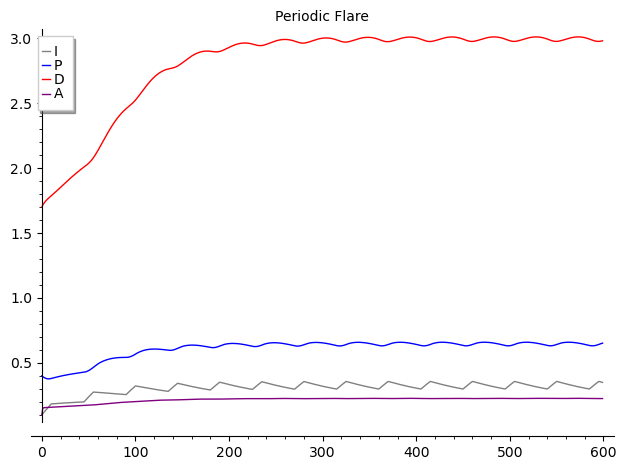

In [80]:
plot_ts4(lupus_periodic_flare(), title = "Periodic Flare")

In [83]:
rng = np.random.default_rng()

In [142]:

# LUPUS STOCHASTIC FLARE IS GETTING RETIRED. 
# SHOULD USE `lupus_flare_tsinput()` with `generate_ts_params()` FOR RANDOM PROCESS INSTEAD

def lupus_stochastic_flare(init = (0.1, 0.4, 1.7, 0.1), # tuple: (I0, P0, D0, A0)
                         tmax=600, # number of days to simulate
                         flare_odds = 0.1, # % likelihood flare will start on a non flare day
                         flare_length = 5, # num of days a flare lasts
                        # si = 0.002, # base rate that immune complexes deposit in the kidneys
                         #sid = 0.015, # base immune response to accumulation of damaged cells
                         kid = 1,
                         kip = 0.025, #rate of immune complex removal from system
                         kpi = 0.13, #rate of mediator activation and recruitment
                         kpp = 0.02, #immune response amplified by existing inflammatory response (kpi)
                         kpd = 0.001, #rate of activation for pro-inflammatory agents as a result of cytokine release or induced by damaged tissue
                         mup = 0.06, #decay of pro-inflammatory mediators
                         kdip = 0.025, #rate of phagocytosis of immune complexes by immune cells
                         kdp = 0.27, #rate at which collateral damage is produced by pro-inflammatory mediators 
                         mud = 0.04, #decay rate of damage
                         sa = 0.05, #addition of anti-inflammatory drugs
                         kap = 0.022, #intrarenal production of anti-inflammatory mediators
                         kad = 0.22, #intrarenal rate of tissue damage ??
                         mua = 2.2, #rate of anti-inflammatory agent degradation
                         Ainf = 1
                        ):

    Lupusvars = list(var("I", "P", "D", "A"))
    t_range = srange(0, tmax, 1)
    # set some values to keep track of if we are on a flare
    #is_on_flare = False
    #flare_day_counter = 0
    class flare_tracker:
        def __init__(self, is_on_flare, flare_day_counter):
            self.is_on_flare = is_on_flare
            self.flare_day_counter = flare_day_counter

    my_f_tracker = flare_tracker(False, 0)

    def fsid_t(t, f_tracker = my_f_tracker): #time dependency Sid
        
        sid = 0.015 # HARD CODE FOR NOW
        
        # end flare if it has been 5 days
        if f_tracker.flare_day_counter > flare_length:
            f_tracker.is_on_flare = False
            f_tracker.flare_day_counter = 0
        
        # give flare value
        if (f_tracker.is_on_flare):
            sid = sid*5
            f_tracker.flare_day_counter += 1 # add one to flare day counter here

        #print("SID to be returned: ", sid)
        return sid 

    def fsi_t(t, f_tracker = my_f_tracker): #time dependency Si
        si = 0.002 # HARD CODE FOR NOW
        if not (f_tracker.is_on_flare):
            # start flare with likelihood `flare_odds`
            flare_start = rng.binomial(n = 1, p = flare_odds)
            if flare_start == 1:
                f_tracker.is_on_flare = True
                
        if (f_tracker.is_on_flare):
            si = si*5

        #print("SI to be returned: ", si)
        return si

    def systems (IPDA, t, si_t,sid_t):
        I, P, D, A = IPDA 
        def f(x):
            return x/((1+A/Ainf)^2) 

        kid = 1
        kip = 0.025 #rate of immune complex removal from system
        kpi = 0.13 #rate of mediator activation and recruitment
        kpp = 0.02 #immune response amplified by existing inflammatory response (kpi)
        kpd = 0.001 #rate of activation for pro-inflammatory agents as a result of cytokine release or induced by damaged tissue
        mup = 0.06 #decay of pro-inflammatory mediators
        kdip = 0.025 #rate of phagocytosis of immune complexes by immune cells
        kdp = 0.27 #rate at which collateral damage is produced by pro-inflammatory mediators 
        mud = 0.04 #decay rate of damage
        sa = 0.05 #addition of anti-inflammatory drugs
        kap = 0.022 #intrarenal production of anti-inflammatory mediators
        kad = 0.22 #intrarenal rate of tissue damage ??
        mua = 2.2 #rate of anti-inflammatory agent degradation
        Ainf = 1

        Idot = f(si_t(t)) + f(sid_t(t))*(D^2/(kid^2 + D^2)) - kip*f(P)*I
        Pdot = f(kpi*I + kpp*P) + f(kpd*D) - mup*P
        Ddot = kdip*f(P)*I + kdp*f(P) - mud*D
        Adot = sa + f(kap*P + kad*D) - mua*A

        LupusSystem = (Idot, Pdot, Ddot, Adot)
        return LupusSystem

    IPDAsim = odeint(systems, init, t_range, args=(fsi_t, fsid_t,))
    IPDAsim = np.insert(IPDAsim, 0, t_range, axis=1)

    return IPDAsim

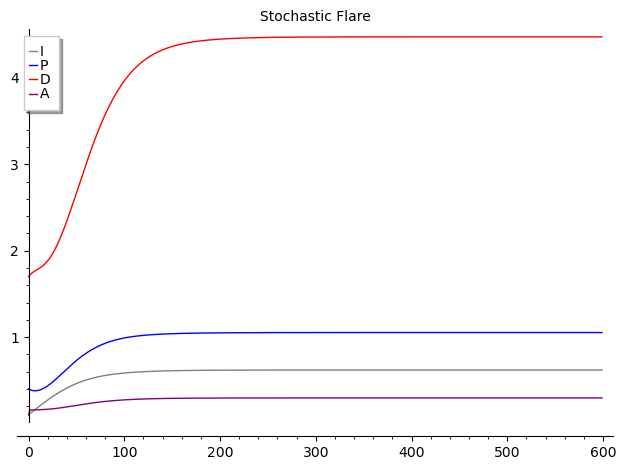

In [149]:
plot_ts4(lupus_stochastic_flare(flare_length=5), title = "Stochastic Flare")

In [300]:
# randomly generate times that have flares
def generate_ts_params(tmax = 600, flare_odds = 0.05, flare_length = 5, si_0 = 0.002, sid_0 = 0.015, sa_0 = 0.2):
    
    # set some values to keep track of if we are on a flare
    flare_ts = []
    flare_tracker = False
    flare_day = 0
    for i in range(tmax):
        event = rng.binomial(n = 1, p = flare_odds)
        if event == 1:
            flare_tracker = True
        if (flare_tracker) & (flare_day < flare_length):
            flare_ts.append("flare")
            flare_day += 1
        else:
            flare_ts.append("no flare")
        if flare_day == flare_length:
            flare_tracker = False
            flare_day = 0

    by_time_params = pd.DataFrame(srange(0, tmax, 1), columns = ["time"], dtype = "float")

    by_time_params['flare_status'] = np.array(flare_ts)

    by_time_params['si'] = np.where(by_time_params['flare_status'] == "flare",
                                si_0 *5,
                                si_0)
    by_time_params['sid'] = np.where(by_time_params['flare_status'] == "flare",
                                sid_0 *5,
                                sid_0)
    by_time_params['sa'] = np.where(by_time_params['flare_status'] == "flare",
                                sa_0/4,
                                sa_0)
    return by_time_params

In [275]:
generate_ts_params()[generate_ts_params()["time"] == 1]["si"]

1    0.002
Name: si, dtype: float64

In [303]:
def lupus_flare_tsinput(by_time_params = generate_ts_params(tmax = 600),
                         init = (0.1, 0.4, 1.7, 0.1), # tuple: (I0, P0, D0, A0)
                         tmax=600, # number of days to simulate # num of days a flare lasts
                         kid = 1,
                         kip = 0.025, #rate of immune complex removal from system
                         kpi = 0.13, #rate of mediator activation and recruitment
                         kpp = 0.02, #immune response amplified by existing inflammatory response (kpi)
                         kpd = 0.001, #rate of activation for pro-inflammatory agents as a result of cytokine release or induced by damaged tissue
                         mup = 0.06, #decay of pro-inflammatory mediators
                         kdip = 0.025, #rate of phagocytosis of immune complexes by immune cells
                         kdp = 0.27, #rate at which collateral damage is produced by pro-inflammatory mediators 
                         mud = 0.04, #decay rate of damage
                         #sa = 0., #addition of anti-inflammatory drugs
                         kap = 0.022, #intrarenal production of anti-inflammatory mediators
                         kad = 0.22, #intrarenal rate of tissue damage ??
                         mua = 2.2, #rate of anti-inflammatory agent degradation
                         Ainf = 1
                        ):

    Lupusvars = list(var("I", "P", "D", "A"))
    t_range = srange(0, tmax, 1)

    def fsid_t(t): #time dependency Sid
        integer = round(t)
        return by_time_params.to_dict(orient = "index").get(integer).get("sid")

    def fsi_t(t): #time dependency Si
        integer = round(t)
        return by_time_params.to_dict(orient = "index").get(integer).get("si")

    def fsa_t(t): #time dependency Sa
        integer = round(t)
        return by_time_params.to_dict(orient = "index").get(integer).get("sa")


    def systems (IPDA, t, si_t,sid_t,sa_t):
        I, P, D, A = IPDA 
        def f(x):
            return x/((1+A/Ainf)^2) 

        Idot = f(si_t(t)) + f(sid_t(t))*(D^2/(kid^2 + D^2)) - kip*f(P)*I
        Pdot = f(kpi*I + kpp*P) + f(kpd*D) - mup*P
        Ddot = kdip*f(P)*I + kdp*f(P) - mud*D
        Adot = sa_t(t) + f(kap*P + kad*D) - mua*A

        LupusSystem = (Idot, Pdot, Ddot, Adot)
        return LupusSystem

    IPDAsim = odeint(systems, init, t_range, args=(fsi_t, fsid_t, fsa_t))
    IPDAsim = np.insert(IPDAsim, 0, t_range, axis=1)

    return IPDAsim

In [305]:
lupus_flare_tsinput()

array([[0.00000000e+00, 1.00000000e-01, 4.00000000e-01, 1.70000000e+00,
        1.00000000e-01],
       [1.00000000e+00, 1.08850452e-01, 3.93139057e-01, 1.71066506e+00,
        2.02501872e-01],
       [2.00000000e+00, 1.17138086e-01, 3.86349445e-01, 1.71504011e+00,
        2.09944604e-01],
       ...,
       [5.97000000e+02, 7.36838573e-01, 1.20124439e+00, 4.99311731e+00,
        3.65419706e-01],
       [5.98000000e+02, 7.33825232e-01, 1.19615627e+00, 4.97916137e+00,
        3.64867647e-01],
       [5.99000000e+02, 7.49044796e-01, 1.19266879e+00, 4.96850214e+00,
        3.26338454e-01]])

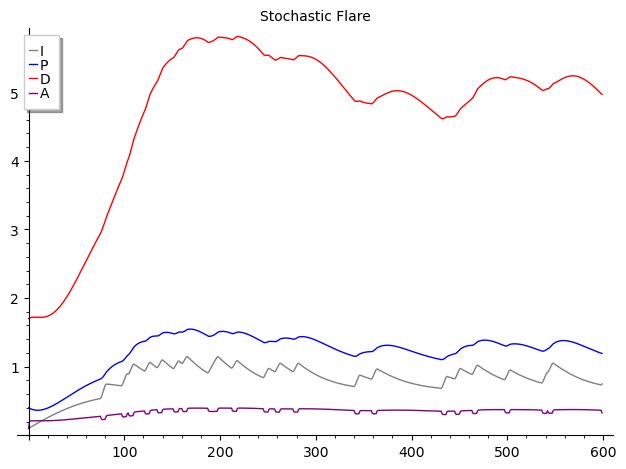

In [304]:
plot_ts4(lupus_flare_tsinput(), title = "Stochastic Flare")